# Setting Up 

In [288]:
# Importing all the requried libraries. 

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
plt.style.use('seaborn-v0_8-darkgrid')


In [289]:
#Importing datasets from yfinance using companies Apple, Microsoft, Tesla, JPMorgan Chase

apple = yf.download('AAPL', start='2020-01-01', end='2025-01-01', auto_adjust=True)
micsft = yf.download('MSFT', start='2020-01-01', end='2025-01-01', auto_adjust=True)
tesla = yf.download('TSLA', start='2020-01-01', end='2025-01-01', auto_adjust=True)
jpmchase = yf.download('JPM', start='2020-01-01', end='2025-01-01', auto_adjust=True)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


# Data Cleaning
  Result : 
       - The data set is perfect. There are no null values in the data set. 

In [290]:
# lets first look at the number of null values in each of the data sets. 
null = { 
    'APPL' : pd.isna(apple).sum().swaplevel(),
    'MSFT' : pd.isna(micsft).sum().swaplevel(),
    'TSLA' : pd.isna(tesla).sum().swaplevel(),
    'JPM'  : pd.isna(jpmchase).sum().swaplevel()
}

null

{'APPL': Ticker  Price 
 AAPL    Close     0
         High      0
         Low       0
         Open      0
         Volume    0
 dtype: int64,
 'MSFT': Ticker  Price 
 MSFT    Close     0
         High      0
         Low       0
         Open      0
         Volume    0
 dtype: int64,
 'TSLA': Ticker  Price 
 TSLA    Close     0
         High      0
         Low       0
         Open      0
         Volume    0
 dtype: int64,
 'JPM': Ticker  Price 
 JPM     Close     0
         High      0
         Low       0
         Open      0
         Volume    0
 dtype: int64}

In [291]:
#There are no null values in the data set. The data set is perfect !

# Analysing the Data

Text(786.9381313131312, 0.5, 'Closing')

<Figure size 800x550 with 0 Axes>

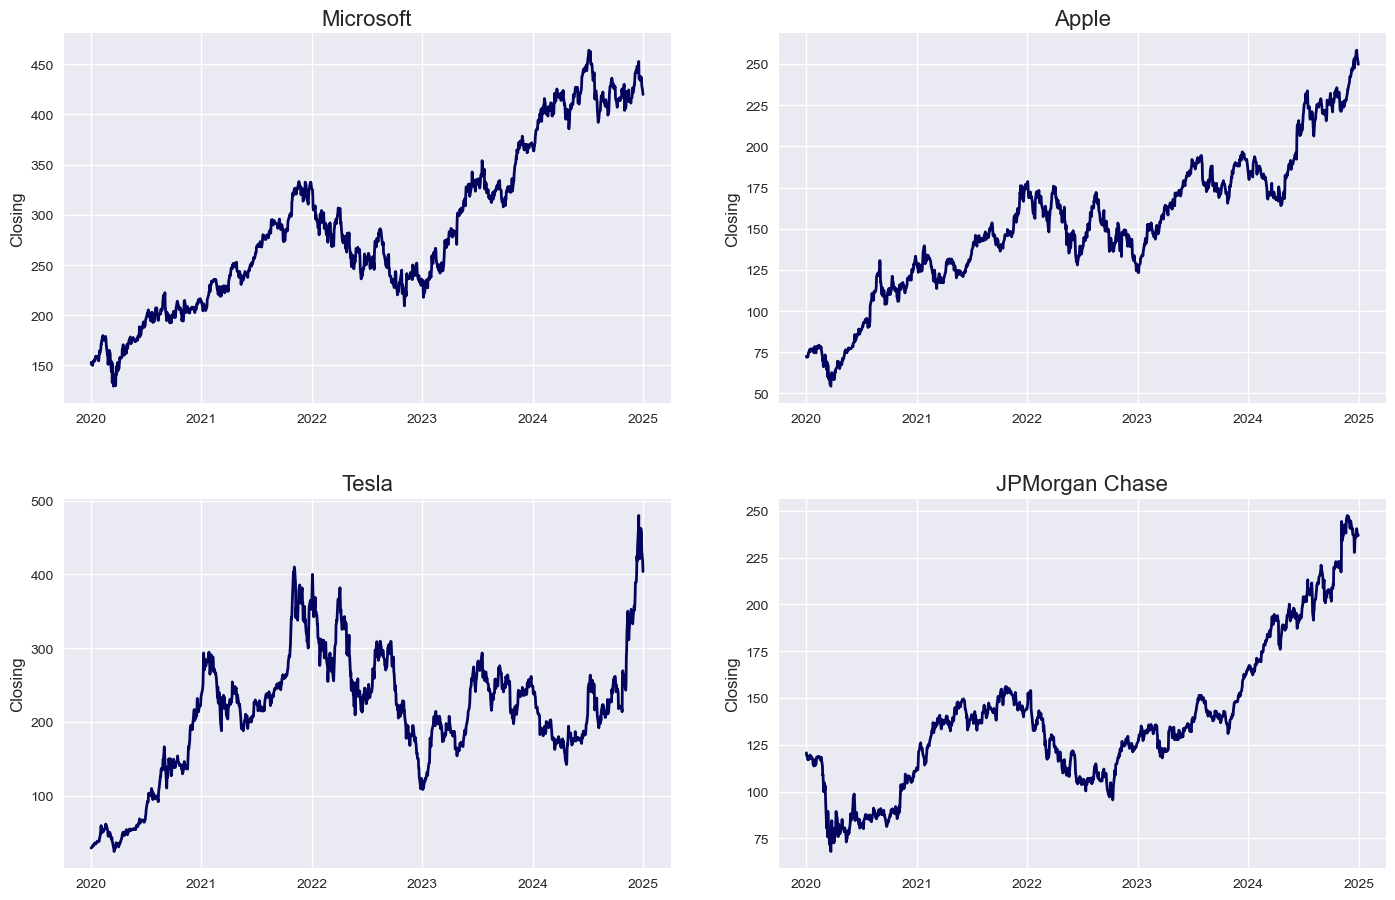

In [292]:
''' Lets look at the closing prices of the stocks of these companies. In this code, I am creating a
           subplot, to help to understand the closing prices of these companies over the years. '''

# First I am creating another dataframe which would contain the closing times of all the companies. 
closing = pd.merge(micsft['Close'], apple['Close'], how='inner', right_on='Date', left_on='Date')
closing = pd.merge(closing, tesla['Close'], how='inner', right_on='Date', left_on='Date')
closing = pd.merge(closing, jpmchase['Close'], how='inner', right_on='Date', left_on='Date')
names = dict(zip((closing.columns), ('Microsoft', 'Apple', 'Tesla', 'JPMorgan Chase')))

# the dataframe closing has all the closing time of the companies.
# Making a subplot which would show the closing prices of the stocks of the companies over the years. 
plt.figure()
fig, ax = plt.subplots(nrows=2,ncols=2, figsize=(15,10))
plt.tight_layout(pad=5.0)

# Plotting the Closing Prices of Microsoft
plt.subplot(2,2,1)
plt.plot(closing['MSFT'], color='#03045e')
plt.title(names['MSFT'])
plt.ylabel('Closing')

# Plotting the Closing Prices of Apple
plt.subplot(2,2,2)
plt.plot(closing['AAPL'], color='#03045e')
plt.title(names['AAPL'])
plt.ylabel('Closing')

# Plotting the Closing Prices of Tesla
plt.subplot(2,2,3)
plt.plot(closing['TSLA'], color='#03045e')
plt.title(names['TSLA'])
plt.ylabel('Closing')

# Plotting the Closing Prices of JPMorgan Chase
plt.subplot(2,2,4)
plt.plot(closing['JPM'], color='#03045e')
plt.title(names['JPM'])
plt.ylabel('Closing')

Some of my thoughts here are : 
           (a) clearly most companies had poor stock prices in covid era.
           (b) thankfully, we the four compaines rise throughout the four years.
           (c) suprisingly we see another dip in the year 2023 ? (Why?)
           (d) from 2023 to 2025 the stocks have increased

<Figure size 800x550 with 0 Axes>

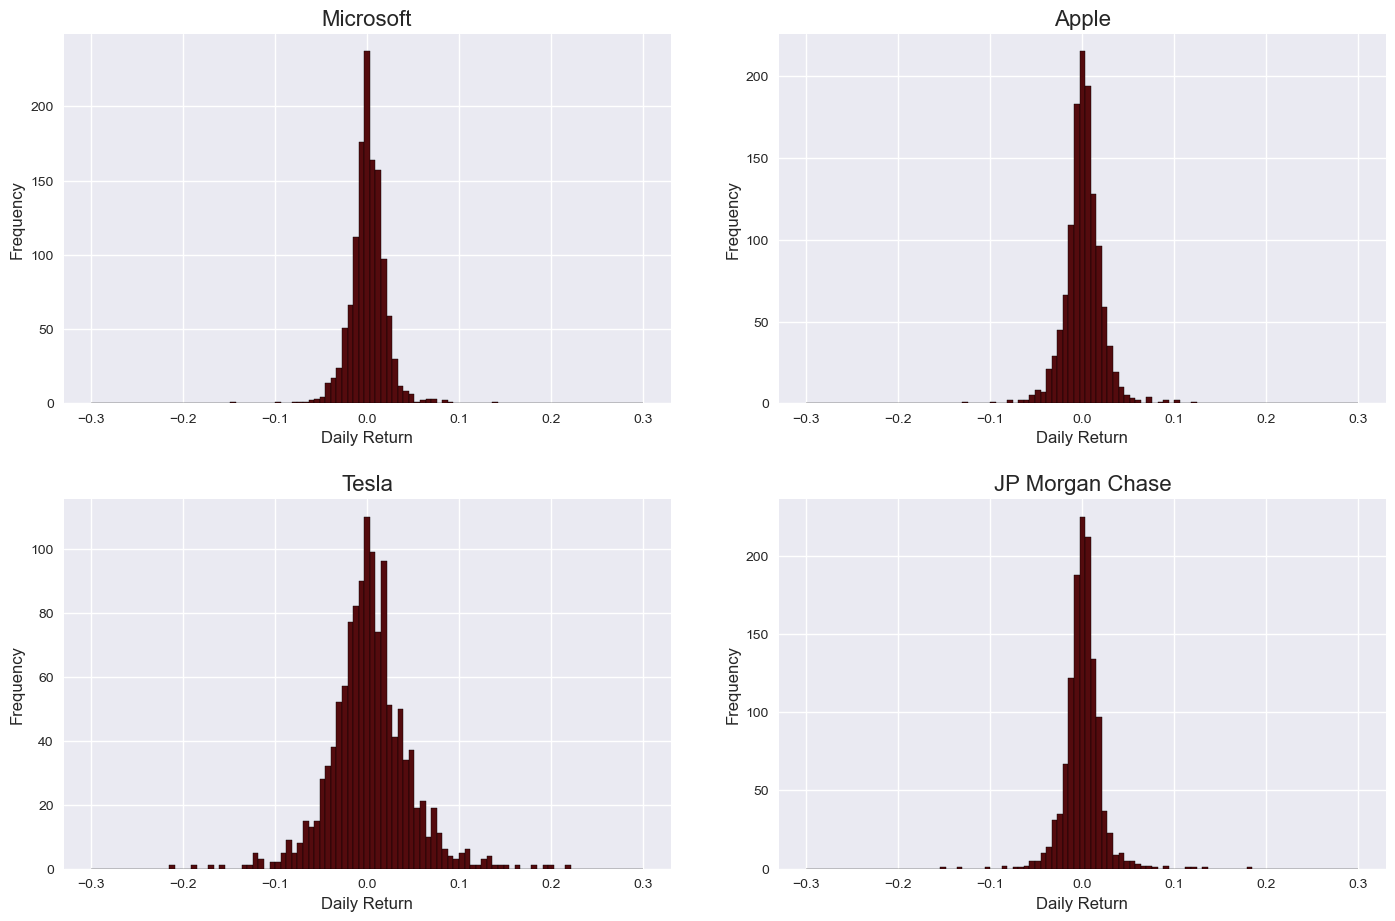

In [299]:
# Lets also look at the daily returns of these companies

#Firstly adding a column that calcuates the Daily Returns of these companies
tesla['Daily Returns'] = tesla['Close'].pct_change().TSLA
apple['Daily Returns'] = apple['Close'].pct_change().AAPL
micsft['Daily Returns'] = micsft['Close'].pct_change().MSFT
jpmchase['Daily Returns'] = jpmchase['Close'].pct_change().JPM

# Now lets plot these returns,
plt.figure()
fig, ax = plt.subplots(nrows=2,ncols=2, figsize=(15,10))
plt.tight_layout(pad=5.0)
plt.title('Distribution of Daily Returns')

for a in range(1, 5):
    plt.subplot(2,2,a)
    if a == 1:
        micsft['Daily Returns'].hist(bins=np.linspace(-0.3, 0.3, 100), color='#540b0e', edgecolor='black')
        plt.title('Microsoft')
    if a == 2:
        apple['Daily Returns'].hist(bins=np.linspace(-0.3, 0.3, 100), color='#540b0e', edgecolor='black')
        plt.title('Apple')
    if a == 3:
        tesla['Daily Returns'].hist(bins=np.linspace(-0.3, 0.3, 100), color='#540b0e', edgecolor='black')
        plt.title('Tesla')
    if a == 4:
        jpmchase['Daily Returns'].hist(bins=np.linspace(-0.3, 0.3, 100), color='#540b0e', edgecolor='black')
        plt.title('JP Morgan Chase')
    
    plt.xlabel('Daily Return')
    plt.ylabel('Frequency')

plt.show()




Note : We see that on average the all four stocks are centered around 0, indicating a stable stock. Also, for AAPL and MSFT are less spread out indicating less fluctuations in the stock. Where as for TSLA we see that the stock fluctuates a lot.

In [294]:
# to put the summary data of these companies into a single dataframe we would have, 
dr = pd.DataFrame({
    'Apple' : apple['Daily Returns'].describe(),
    'Microsoft' : micsft['Daily Returns'].describe(),
    'Tesla' : tesla['Daily Returns'].describe(),
    'JP Morgan Chase' : jpmchase['Daily Returns'].describe()
    }, index=apple['Daily Returns'].describe().index)

dr

,Apple,Microsoft,Tesla,JP Morgan Chase
count,1257.000000,1257.000000,1257.000000,1257.000000
mean,0.001182,0.000988,0.002997,0.000746
std,0.019956,0.019211,0.042320,0.020490
min,-0.128647,-0.147390,-0.210628,-0.149649
25%,-0.008425,-0.008176,-0.020051,-0.008411
50%,0.001187,0.001111,0.001871,0.000709
75%,0.011989,0.010940,0.023769,0.009901
max,0.119808,0.142169,0.219190,0.180125


In [295]:
#Lets also calculate the volatality of the stocks.
def calc_volitility(x):
    avgret = x['Daily Returns'].std()
    return avgret*np.sqrt(252)

print("The annual volitily of Tesla is:", calc_volitility(tesla))
print("The annual volitily of Apple is:", calc_volitility(apple))
print("The annual volitily of Microsoft is:", calc_volitility(micsft))
print("The annual volitily of JP Morgan Chase is:", calc_volitility(jpmchase))


The annual volitily of Tesla is: 0.6718152841934389
The annual volitily of Apple is: 0.3167863158329575
The annual volitily of Microsoft is: 0.30497230263373465
The annual volitily of JP Morgan Chase is: 0.3252655651431592


The above data is perfectly aided by information from the previous graphs.

<Figure size 800x550 with 0 Axes>

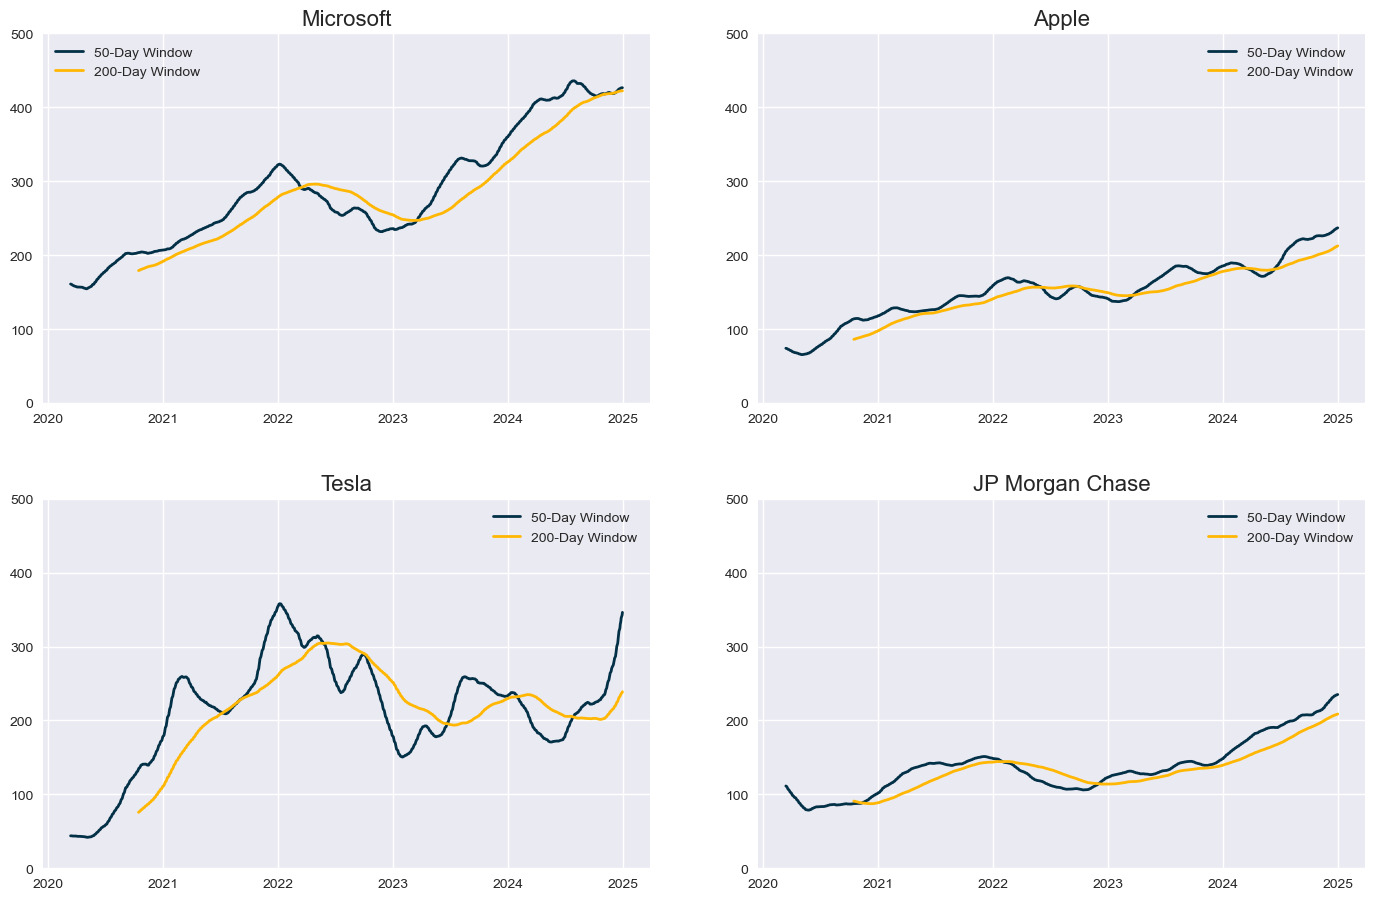

In [296]:
# Lets compute the moving average to have a clearer undrestanding of trends over time. Here, I am computing a 50-day and 200-day moving average
#        to see if we can see a golden or death cross. 

plt.figure()
fig, ax = plt.subplots(2,2, figsize=(15,10))
plt.tight_layout(pad=5.0)

# using the first subplot for Microsoft 
plt.subplot(2,2,1)
plt.plot(closing['MSFT'].rolling(50).mean(), color='#023047', label='50-Day Window')
plt.plot(closing['MSFT'].rolling(window=200).mean(), color='#ffb703', label='200-Day Window')
plt.title('Microsoft')
plt.yticks(np.arange(0, 501, 100))
plt.legend()

# similarly plotting the other subplots of the graph too. 
plt.subplot(2,2,2)
plt.plot(closing['AAPL'].rolling(50).mean(), color='#023047', label='50-Day Window')
plt.plot(closing['AAPL'].rolling(window=200).mean(), color='#ffb703', label='200-Day Window')
plt.title('Apple')
plt.yticks(np.arange(0, 501, 100))
plt.legend()

plt.subplot(2,2,3)
plt.plot(closing['TSLA'].rolling(50).mean(), color='#023047', label='50-Day Window')
plt.plot(closing['TSLA'].rolling(window=200).mean(), color='#ffb703', label='200-Day Window')
plt.title('Tesla')
plt.yticks(np.arange(0, 501, 100))
plt.legend()

plt.subplot(2,2,4)
plt.plot(closing['JPM'].rolling(50).mean(), color='#023047', label='50-Day Window')
plt.plot(closing['JPM'].rolling(window=200).mean(), color='#ffb703', label='200-Day Window')
plt.title('JP Morgan Chase')
plt.yticks(np.arange(0, 501, 100))
plt.legend()


In [297]:
def cumulative_return(x):
    ret = (x.iloc[len(x)-1].Close - x.iloc[0].Close)/(x.iloc[0].Close)
    ret = (ret*100).iloc[0]
    return round(ret, 1)

print('The Cumulative return on Microsoft stock is :', cumulative_return(micsft))
print('The Cumulative return on Apple stock is :', cumulative_return(apple))
print('The Cumulative return on Tesla stock is :', cumulative_return(tesla))
print('The Cumulative return on JP Morgan Chase stock is :', cumulative_return(jpmchase))

The Cumulative return on Microsoft stock is : 174.4
The Cumulative return on Apple stock is : 244.0
The Cumulative return on Tesla stock is : 1307.9
The Cumulative return on JP Morgan Chase stock is : 96.3


In [298]:
# lets also calculate the anuualized returns
def annualized_ret(x, years):
    ret = np.power( (1 + cumulative_return(x)/100 ), 1/years )
    return round((ret - 1)*100, 2)

print('The Annualized Return on Microsoft Stock is :', annualized_ret(micsft, 5))
print('The Annualized Return on Apple Stock is :', annualized_ret(apple, 5))
print('The Annualized Return on Tesla Stock is :', annualized_ret(tesla,5))
print('The Annualized Return on JP Morgan Chase Stock is :', annualized_ret(jpmchase, 5))

The Annualized Return on Microsoft Stock is : 22.37
The Annualized Return on Apple Stock is : 28.03
The Annualized Return on Tesla Stock is : 69.71
The Annualized Return on JP Morgan Chase Stock is : 14.44
